# <center> Module 5

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

#### 1

#### 2

(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(40440,) (40440,) (40440,)
(

C:\Users\darko\AppData\Local\Temp\ipykernel_25024\3934971264.py:106: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


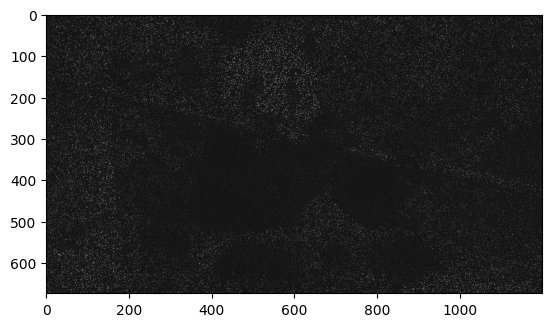

In [1]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as transform

img = iio.imread("panda.png")
# generating grayscale image:
bw_img=np.sum(img,2)/3
N = bw_img.shape[0]*img.shape[1]
# Take a number sample_num of samples and generate their
# horizontal and vertical coordinates (indicies) randomly in arrays xcoord, ycoord
sample_num = int(N * 0.05)  # 5% of N
xcoord = np.random.randint(0, bw_img.shape[0], sample_num)
ycoord = np.random.randint(0, bw_img.shape[1], sample_num)

# Store these samples in an array called y.
y = bw_img[xcoord, ycoord]

# The goal is to find the dct components x of the image from y and
# then use inverse dct to reconstruct the image.

def sq_loss_gradient(x,y, xcoord, ycoord):
    # samp_approx is Ax
    img_approx= transform.idct(transform.idct(x, axis=1, norm='ortho'),axis=0, norm='ortho')
    print(y.shape, xcoord.shape, ycoord.shape)
    samp_approx=np.zeros(y.shape)
    for l in range(y.shape[0]):
        samp_approx[l]=img_approx[xcoord[l],ycoord[l]]

    # The following calculates e=Ax-y
    error=samp_approx-y
    img_err=np.zeros(bw_img.shape)
    for l in range(sample_num):
        img_err[xcoord[l],ycoord[l]]=error[l]
    # This calculates A^Te which is the gradient 
    grad=transform.dct(transform.dct(img_err, axis=0, norm='ortho'),axis=1, norm='ortho')

    return grad, samp_approx

def shrinkage(x,alpha):
    # Implement the shrinkage operator which is the proximal operator
    # of the regularizer
    return np.sign(x) * np.maximum(np.abs(x) - alpha, 0)
    
def calculate_obj_ISTA(x, y, Ax, lamb):
    return np.sum((y - Ax) + lamb*np.linalg.norm(x))

def ISTA(y, xcoord, ycoord, alpha, xinit, step=0.99, iternum=100):
    # Implement the iteration and also calculate the objective value and
        # the vaue of the regularization term at each iteration
        # Calculate the gradient
    # Initialization:
    x = []  # Initialize x
    x.append(xinit)  # x[0] is the initial point
    obj_val = []
    
    for iter in range(iternum):
        grad, Ax = sq_loss_gradient(x[-1], y, xcoord, ycoord)
        x_hat = x - step*grad
        x  = shrinkage(x_hat, alpha)
        obj_val.append(calculate_obj_ISTA(x, y, Ax, step))
    return x[-1]

def FISTA(y, xcoord, ycoord, alpha, xinit, step=0.99, iternum=100):
    # Implement the FISTA algorithm similar to ISTA
    # It needs extra variables t and z    
    # Initialization:
    x = np.zeros((iternum, xinit.shape[0], xinit.shape[1]))  # Initialize x
    z = x.copy()  # Initialize z
    t = np.zeros(iternum)  # Initialize t
    t[0] = 1  # t[0] is the initial point

    for iter in range(iternum - 1):
        x_old = x[iter]
        z_old = z[iter]
        t_old = t[iter]

        # Compute the gradient at z
        grad = sq_loss_gradient(z_old, y, xcoord, ycoord)

        # Update x
        print(z_old[iter])
        x[iter+1] = shrinkage(z_old[iter] - step * grad, alpha)

        # Update t
        t[iter+1] = (1 + np.sqrt(1 + 4 * t_old**2)) / 2

        # Update z
        z[iter+1] = x[iter+1] + ((t_old - 1) / t[iter+1]) * (x[iter+1] - x_old)

    return x[iter+1]

# run ISTA/FISTA and generate the approximate DCT coefficients x
# Then, generate the recovered image
    #aplha is related to the step size and a regularisation parameter
alpha = 0.1
x_ISTA = ISTA(y, xcoord, ycoord, alpha, np.zeros(bw_img.shape), step=0.99, iternum=100)
img_approx_ISTA = transform.idct(transform.idct(x_ISTA, axis=1),axis=0, norm='ortho')

#x_FISTA = FISTA(y, xcoord, ycoord, 0.1, np.zeros(bw_img.shape), step=0.99, iternum=100)
#img_approx_FISTA = transform.idct(transform.idct(x_FISTA, axis=1),axis=0, norm='ortho')

# Plot the result
fig = plt.figure()    
plt.imshow(img_approx_ISTA, cmap='gray')
fig.show()

# Plot the result
#fig = plt.figure()    
#plt.imshow(img_approx_FISTA, cmap='gray')
#fig.show()


# Q.3 
Matrix Factorization In this part, we try a nonconvex problem known as matrix factorization. Given a m×n matrix $X$, we seek a factorization of the following form $X ≈ BR$ where $B$ is n×k and $R$ is k×m for a given k. One way to interpret this problem is that when each column of $X$ is an m−dimensional data point, then the columns of $B$ form a basis set and each column of $R$ is a representation of its corresponding data point in $X$. 
The factorization problem is in general heavily over parametrized (ill-posed), so usually extra assumptions are considered. Under these constraints, one way to find the factorization is to minimize the following loss function:

$$
L(R,B) = ||X-BR||^2_F
$$

# 1. 
Suppose that $B$ is unconstrained but each column of $R$ is zero except in exactly one entry, where it is one. Show (in words or by math) that in this case minimizing $L$ is equivalent to K−means clustering, where each column of $B$ is a centroid.

# GPT:
In this scenario, where each column of $R$ has only one non-zero entry (which is one), and $B$ is unconstrained, the matrix factorization problem is equivalent to K-means clustering. Let's see why this is the case:

The matrix factorization problem is to minimize the loss function:

$$
L(R, B) = ||X - BR||_F^2
$$

Here, $B$ is an n×k matrix, and each column of $R$ is a k-dimensional vector with only one non-zero entry, which is one. This means that each column of $R$ corresponds to one of the k centroids in K-means clustering.

Now, let's consider the matrix multiplication $BR$. Since each column of $R$ has only one non-zero entry, the product $BR$ selects exactly one column from $B$ corresponding to the non-zero entry in each column of $R$. Therefore, $BR$ effectively assigns each data point in $X$ to the centroid represented by the selected column in $B$.

The objective function $||X - BR||_F^2$ measures the sum of squared distances between each data point in $X$ and its assigned centroid in $B$. This is essentially the same as the objective function in K-means clustering, where we aim to minimize the sum of squared distances between data points and their assigned centroids.

In summary, when each column of $R$ has only one non-zero entry, and $B$ is unconstrained, the matrix factorization problem is equivalent to K-means clustering, where each column of $B$ represents a centroid, and the objective is to minimize the sum of squared distances between data points and their assigned centroids.

### 1.

When $B$ is unconstrained and each column of $R$ is zero except in exactly one entry, where it is one, the $BR$ is going to become one dimentional vector with zeros everywhere except for one entry. Considering the k-means clustering objective function

$$
\arg\min_S \sum^k_{i=1} \sum_{x_j \in S_i} ||x - \mu_i||^2
$$

$BR$ becomes the same as $\mu$ vector in k-means clustering as only one dimension is going to have value and the rest are going to be zero. Therefore, the objective function becomes the same as the k-means clustering objective function.

# 2.
Show that the gradient of $L$ is given by

$$
\frac{\partial L}{\partial R} = B^T E , \frac{\partial L}{\partial B} = E R^T
$$

where $E = BR − X$.

# GPT:
To find the gradients of the loss function $L$ with respect to the matrices $R$ and $B$, we can use the chain rule and the properties of matrix derivatives. Let's calculate the gradients step by step:

Given the loss function:

$$
L(R, B) = ||X - BR||_F^2
$$

where $E = BR - X$, we have:

$$
L(R, B) = ||E||_F^2
$$

Now, let's find the gradient with respect to $R$:

$$
\frac{\partial L}{\partial R} = \frac{\partial}{\partial R} ||E||_F^2
$$

Using the chain rule, we get:

$$
\frac{\partial L}{\partial R} = 2E \frac{\partial E}{\partial R}
$$

Now, $\frac{\partial E}{\partial R}$ is the Jacobian matrix of $E$ with respect to $R$. Since $E = BR - X$, each element of $E$ depends on the corresponding elements of $R$. Therefore, $\frac{\partial E}{\partial R} = B$.

Substituting this back into the expression, we get:

$$
\frac{\partial L}{\partial R} = 2EB
$$

Now, for the given expression $E = BR - X$, let's find the gradient with respect to $B$:

$$
\frac{\partial L}{\partial B} = \frac{\partial}{\partial B} ||E||_F^2
$$

Using the chain rule again, we get:

$$
\frac{\partial L}{\partial B} = 2E \frac{\partial E}{\partial B}
$$

Now, $\frac{\partial E}{\partial B}$ is the Jacobian matrix of $E$ with respect to $B$. Since $E = BR - X$, each element of $E$ depends on the corresponding elements of $B$. Therefore, $\frac{\partial E}{\partial B} = I_k$, the identity matrix of size $k \times k$.

Substituting this back into the expression, we get:

$$
\frac{\partial L}{\partial B} = 2E I_k = 2E
$$

Now, substitute $E = BR - X$ back into the expressions:

$$
\frac{\partial L}{\partial R} = 2(BR - X)B^T = B^T E
$$

$$
\frac{\partial L}{\partial B} = 2(BR - X)R^T = E R^T
$$

So, the gradients are as follows:

$$
\frac{\partial L}{\partial R} = B^T E
$$

$$
\frac{\partial L}{\partial B} = E R^T
$$

# 3.
Implement the (simplified) Proximal (i.e. Projected) gradient (PG) with momentum parameter $\beta > 0$ for the case that $0 ≤ B ≤ 1$ and $0 ≤ R ≤ 1$. Test your implementation in an experiment that $X$ is generated by some true matrices $B10×20$ and $R20×100$. Each element of $B$ is 0 with probability 0.5 or otherwise 1. Each element of $R$ uniformly distributed between 0 and 1. Run the algorithm for different $\beta$ and step size less than 10−3. Initialize randomly. Make sure that the algorithm converges (you might need 10000 iterations or more).


Running Proximal Gradient with beta = 0.01...
Reconstruction Error (beta=0.01): 3.251361481042324e-05

Running Proximal Gradient with beta = 0.11888888888888888...
Reconstruction Error (beta=0.11888888888888888): 4.7904531812754784e-05

Running Proximal Gradient with beta = 0.22777777777777777...
Reconstruction Error (beta=0.22777777777777777): 3.745418628292883e-05

Running Proximal Gradient with beta = 0.33666666666666667...
Reconstruction Error (beta=0.33666666666666667): 4.953060435377933e-05

Running Proximal Gradient with beta = 0.44555555555555554...
Reconstruction Error (beta=0.44555555555555554): 5.682377792152675e-05

Running Proximal Gradient with beta = 0.5544444444444444...
Reconstruction Error (beta=0.5544444444444444): 2.912389407533832e-05

Running Proximal Gradient with beta = 0.6633333333333333...
Reconstruction Error (beta=0.6633333333333333): 3.9735127826185826e-05

Running Proximal Gradient with beta = 0.7722222222222221...
Reconstruction Error (beta=0.77222222222

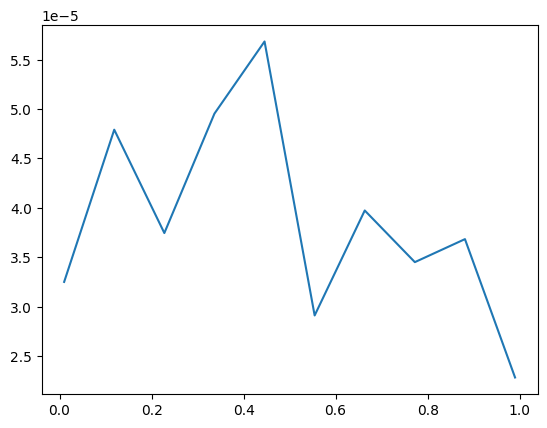

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def proximal_gradient(X, k, beta, max_iter=100000, step_size=1e-3, tolerance=1e-4):
    # m, n = X.shape
    # B = np.random.rand(m, k)
    # R = np.random.rand(k, n)
    # for i in range(max_iter):
    #     B_old = B.copy()
    #     R_old = R.copy()
    #     B = B - step_size * (B @ R - X) @ R.T
    #     B = np.maximum(B - beta * step_size, 0)
    #     R = R - step_size * B.T @ (B @ R - X)
    #     if np.linalg.norm(B - B_old) + np.linalg.norm(R - R_old) < tolerance:
    #         print(f"Converged after {i} iterations.")
    #         break
    # return B, R
    m, n = X.shape
    B = np.random.rand(m, k)
    R = np.random.rand(k, n)

    for _ in range(max_iter):
        # Compute the gradient
        E = B @ R - X
        gradient_B = 2 * E @ R.T
        gradient_R = B.T @ E

        # Update with momentum
        if _ == 0:
            momentum_B = gradient_B
            momentum_R = gradient_R
        else:
            momentum_B = beta * momentum_B + (1 - beta) * gradient_B
            momentum_R = beta * momentum_R + (1 - beta) * gradient_R

        # Update B and R using the proximal operator
        B = np.clip(B - step_size * momentum_B, 0, 1)
        R = np.clip(R - step_size * momentum_R, 0, 1)

        # Check for convergence
        if np.linalg.norm(gradient_B) + np.linalg.norm(gradient_R) < tolerance:
            break

    return B, R


# Generate synthetic data
np.random.seed(42)
true_B = (np.random.rand(10, 20) < 0.5).astype(float)
true_R = np.random.rand(20, 100)

X = true_B @ true_R

# Run the algorithm for different beta values
# betas = [0.1, 0.5, 0.99]
betas = np.linspace(0.01, 0.99, 10)
r_error = []
for beta in betas:
    print(f"\nRunning Proximal Gradient with beta = {beta}...")
    B_hat, R_hat = proximal_gradient(X, k=20, beta=beta)

    # Print the reconstruction error
    reconstruction_error = np.linalg.norm(X - B_hat @ R_hat)
    print(f"Reconstruction Error (beta={beta}): {reconstruction_error}")
    r_error.append(reconstruction_error)
    # plt.plot(B_hat @ R_hat, "*", label=f"beta_hat")
    # plt.plot(X, ".", label="True B")
    # plt.legend()
    # plt.show()
    # print(f"B_hat:\n{B_hat.shape}")
    # print(f"True B:\n{true_B.shape}")
    # print(f"R_hat:\n{R_hat.shape}")
    # print(f"True R:\n{true_R.shape}")
    
    
plt.plot(betas, r_error)
